In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd

/home/harsh/anaconda2/lib/python2.7/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 2] No such file or directory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


In [3]:
degrees_that_pay_back = pd.read_csv("degrees-that-pay-back.csv")
salaries_by_college_type = pd.read_csv("salaries-by-college-type.csv")
salaries_by_region = pd.read_csv("salaries-by-region.csv")

### Lets get familiar with the data first:

In [4]:
degrees_that_pay_back.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


### Observations:
<p>
<font size =3 >
**1. **We see that the entries for all the salary columns have dollar sign in them which raises a suspision that they have to be dealt with first because most probably they are strings.<br><br>
**2. **Percentage change column lies in between other columns, and mid-career median salary should be properly alligned, i.e. columns need some reordering for the ease of analysis.<br><br>
**3. **The column names are very long so we need to rename them.
</font></p>

## Formulating questions :
- which UG_major's have high starting salary?
- what is the most common percent change in salaries ?



# 1.Data Cleaning

### a)Reordering and manupulating names of the columns :

In [5]:
cols = list(degrees_that_pay_back)

cols.insert(1,cols.pop(cols.index('Percent change from Starting to Mid-Career Salary')))
cols.insert(5,cols.pop(cols.index('Mid-Career Median Salary')))

cols

['Undergraduate Major',
 'Percent change from Starting to Mid-Career Salary',
 'Starting Median Salary',
 'Mid-Career 10th Percentile Salary',
 'Mid-Career 25th Percentile Salary',
 'Mid-Career Median Salary',
 'Mid-Career 75th Percentile Salary',
 'Mid-Career 90th Percentile Salary']

In [6]:
degrees_that_pay_back=degrees_that_pay_back.loc[:,cols]
degrees_that_pay_back.columns = cols=["Major",'Percentchange_start_to_mid','Start','Mid_10th','Mid_25th','Mid_50th','Mid_75th','Mid_90th']
degrees_that_pay_back.head(3)

,Major,Percentchange_start_to_mid,Start,Mid_10th,Mid_25th,Mid_50th,Mid_75th,Mid_90th
0,Accounting,67.6,"$46,000.00","$42,200.00","$56,100.00","$77,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,75.0,"$57,700.00","$64,300.00","$82,100.00","$101,000.00","$127,000.00","$161,000.00"
2,Agriculture,68.8,"$42,600.00","$36,300.00","$52,100.00","$71,900.00","$96,300.00","$150,000.00"


In [7]:
df = degrees_that_pay_back


<font size =3>**Okay.. so now that columns have been reorderd and renamed, lets take a look at the data info**</font>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Major                         50 non-null object
Percentchange_start_to_mid    50 non-null float64
Start                         50 non-null object
Mid_10th                      50 non-null object
Mid_25th                      50 non-null object
Mid_50th                      50 non-null object
Mid_75th                      50 non-null object
Mid_90th                      50 non-null object
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


In [9]:
type(df.Start[0])

str

<br>
<font size =4 >
We can see that only one coloumn is in float format and all the others are string and as we were lucky enough to have no missing values we can move on to the next step
</font>

### b) Convert all string values to float for all columns:

In [10]:
def convert(col):
#for col in columns:
    df[col] = df[col].map(lambda x : x.split('$')[1]).map(lambda x: float(x.split(',')[0]+x.split(',')[1]))


In [11]:
for col in df.columns[2:]:
    convert(col)

In [12]:
df.head(3)

,Major,Percentchange_start_to_mid,Start,Mid_10th,Mid_25th,Mid_50th,Mid_75th,Mid_90th
0,Accounting,67.6,46000.0,42200.0,56100.0,77100.0,108000.0,152000.0
1,Aerospace Engineering,75.0,57700.0,64300.0,82100.0,101000.0,127000.0,161000.0
2,Agriculture,68.8,42600.0,36300.0,52100.0,71900.0,96300.0,150000.0


<br>
<font size =3>
We have successfully converted and cleansed the data. Finally time for real analytical work
</font>

# 2. Data Analysis

### Lets take a look at statistics

In [13]:
df.describe()

,Percentchange_start_to_mid,Start,Mid_10th,Mid_25th,Mid_50th,Mid_75th,Mid_90th
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,69.274000,44310.000000,43408.000000,55988.000000,74786.00000,102138.000000,142766.000000
std,17.909908,9360.866217,12000.779567,13936.951911,16088.40386,20636.789914,27851.249267
min,23.400000,34000.000000,26700.000000,36500.000000,52000.00000,70500.000000,96400.000000
25%,59.125000,37050.000000,34825.000000,44975.000000,60825.00000,83275.000000,124250.000000
50%,67.800000,40850.000000,39400.000000,52450.000000,72000.00000,99400.000000,145500.000000
75%,82.425000,49875.000000,49850.000000,63700.000000,88750.00000,118750.000000,161750.000000
max,103.500000,74300.000000,71900.000000,87300.000000,107000.00000,145000.000000,210000.000000


<br><br>
<font size =4>
We can see that majority of the majors might have a starting salary in range of <u>44310</u> while depending on your performance starting salary might go upto <u>142766</u>(90th percentile)<br><br>
Lets sort the columns acc to highest salary to get insight on major with highest starting salary 
</font>
<br><br>

In [14]:
df.sort_values(by="Start",ascending=False,inplace=True)
df.reset_index(inplace=True)
df.head(4)

,index,Major,Percentchange_start_to_mid,Start,Mid_10th,Mid_25th,Mid_50th,Mid_75th,Mid_90th
0,43,Physician Assistant,23.4,74300.0,66400.0,75200.0,91700.0,108000.0,124000.0
1,8,Chemical Engineering,69.3,63200.0,71900.0,87300.0,107000.0,143000.0,194000.0
2,12,Computer Engineering,71.0,61400.0,66100.0,84100.0,105000.0,135000.0,162000.0
3,19,Electrical Engineering,69.1,60900.0,69300.0,83800.0,103000.0,130000.0,168000.0


<br><br>
<font size =3>
Physician Asistant has the highest starting salary, but in the top four results itself we can see that the mid career salary for top performers may vary significantly as can be seen in the second case i.e. Chemical Engineering steals the light from Physician Assisstant.
<br>
<br>
From the statistics above we could also make conclusion that even if the start salary may be higher than the others,the salaries in **90th percentile** can be way higher and different from what was started, as the **max salary** in 90th percentile is **210000** which is way higher than what is seen for Physician Assisstant
</font>
<br>
<br>

# 3. Visualization

<br>
<font size = 4>
Lets do some visualization on this data to see how much is the variance in salaries for all performers:
</font>
<br>
<br>

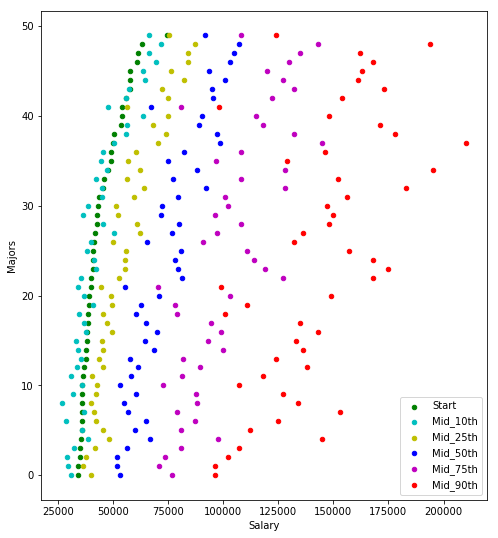

In [15]:
f,ax = plt.subplots(figsize = (8,9))
df['index'] =sorted(df['index'],reverse=True) 
ax1 = df.plot(kind="scatter",x="Start",y="index",ax=ax,color='g',label="Start")
ax2 = df.plot(kind="scatter",x="Mid_10th",y="index",ax=ax,color='c',label="Mid_10th")
ax3 = df.plot(kind="scatter",x="Mid_25th",y="index",ax=ax,color='y',label="Mid_25th")
ax4 = df.plot(kind="scatter",x="Mid_50th",y="index",ax=ax,color='b',label="Mid_50th")
ax5 = df.plot(kind="scatter",x="Mid_75th",y="index",ax=ax,color='m',label="Mid_75th")
ax6 = df.plot(kind="scatter",x="Mid_90th",y="index",ax=ax,color='r',label="Mid_90th")

ax.set_xlabel("Salary")
ax.set_ylabel("Majors")

### In this scatterplot we can clearly see how the distribution of salary varies and becomes dispersed w.r.t the percentile you are in and which major you pursue. 
<br>
<font size =3>
For a bit more of clear visualization lets plot a swarmplot for the same observation as scatterplot
</font>
<br><br>

In [16]:
df1 = df.drop(["index","Percentchange_start_to_mid"],axis=1)


In [17]:
df1 = df1.melt(id_vars="Major",value_vars=['Start','Mid_10th','Mid_25th','Mid_50th','Mid_75th','Mid_90th'],var_name="Category",value_name="Salary")
df1.head()

,Major,Category,Salary
0,Physician Assistant,Start,74300.0
1,Chemical Engineering,Start,63200.0
2,Computer Engineering,Start,61400.0
3,Electrical Engineering,Start,60900.0
4,Mechanical Engineering,Start,57900.0


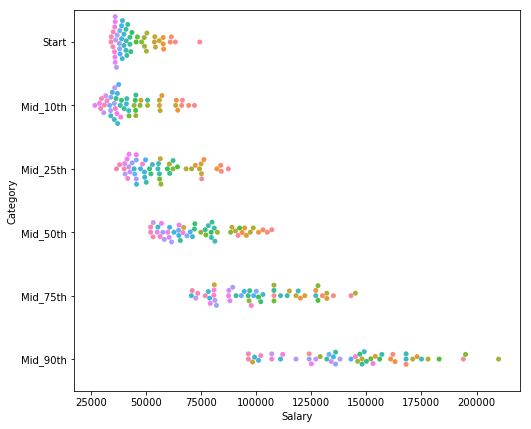

In [19]:
f,ax = plt.subplots(figsize=(8,7))
sns.swarmplot( data=df1, y="Category", x="Salary", hue="Major",orient="h",ax=ax)
ax.legend_.remove()

### One surprising thing which we observe over here is that the salaries for Start is higher than that of the 10th percentile, which means there was a salary drop from the start to mid career for 10th percentile performers.

### We also observe how the distribution gets thinner but higher with the percentile, which we also observed in scatterplot.

<font size = 3 >
Lets now try to answer the question what is the most common percentage salary change from start to mid-career.
</font><br><br>

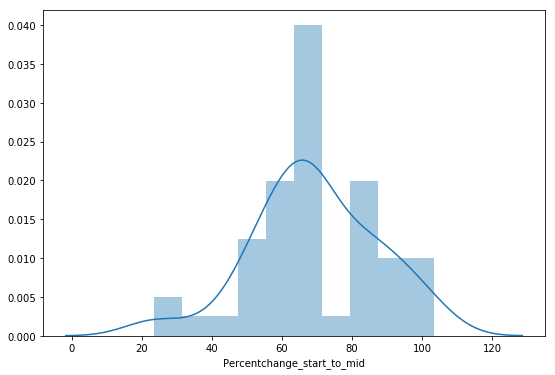

In [34]:
f,ax = plt.subplots(figsize=(9,6))
sns.distplot(df.Percentchange_start_to_mid,bins=10)

## Here we can make out that the most common percentage wise salary change from start to mid career is astonishingly in range of 60 to 70 %